In [121]:
import re
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from jupyterthemes import jtplot
jtplot.style('onedork')

In [39]:
df=pd.read_csv('Global_Youtube_Statistics_2023_Clean.csv')

In [48]:
#Statistics by Subscribers

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels
top_10_subs = df[select_columns].head(10)

#Convert 'Subscriber' in millions
top_10_subs['Subscribers (million)'] = (top_10_subs['Subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'Subscribers (million)']]

#Show dataframe
top_10_subs

,Youtuber,Subscribers (million)
0,T-Series,245
1,MrBeast,166
2,Cocomelon - Nursery Rhymes,162
3,SET India,159
4,Kids Diana Show,112
5,PewDiePie,111
6,Like Nastya,106
7,Vlad and Niki,98
8,Zee Music Company,96
9,WWE,96


In [50]:
#Statistics by Video Views

#Select columns to show output
select_columns = ['Youtuber', 'Video Views']

#Filter dataframe for top 10 most video views Youtuber channels
youtube_videoviews = df[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'Video Views', ascending= False).head(10)

#Convert 'Video Views' in billions
top_10_views['Video Views (billion)'] = (top_10_views['Video Views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop=True)

#Show dataframe
top_10_views


,Youtuber,Video Views (billion)
0,T-Series,228
1,Cocomelon - Nursery Rhymes,164
2,SET India,148
3,Sony SAB,101
4,Kids Diana Show,93
5,Like Nastya,90
6,WWE,77
7,Vlad and Niki,77
8,Zee TV,73
9,Colors TV,61


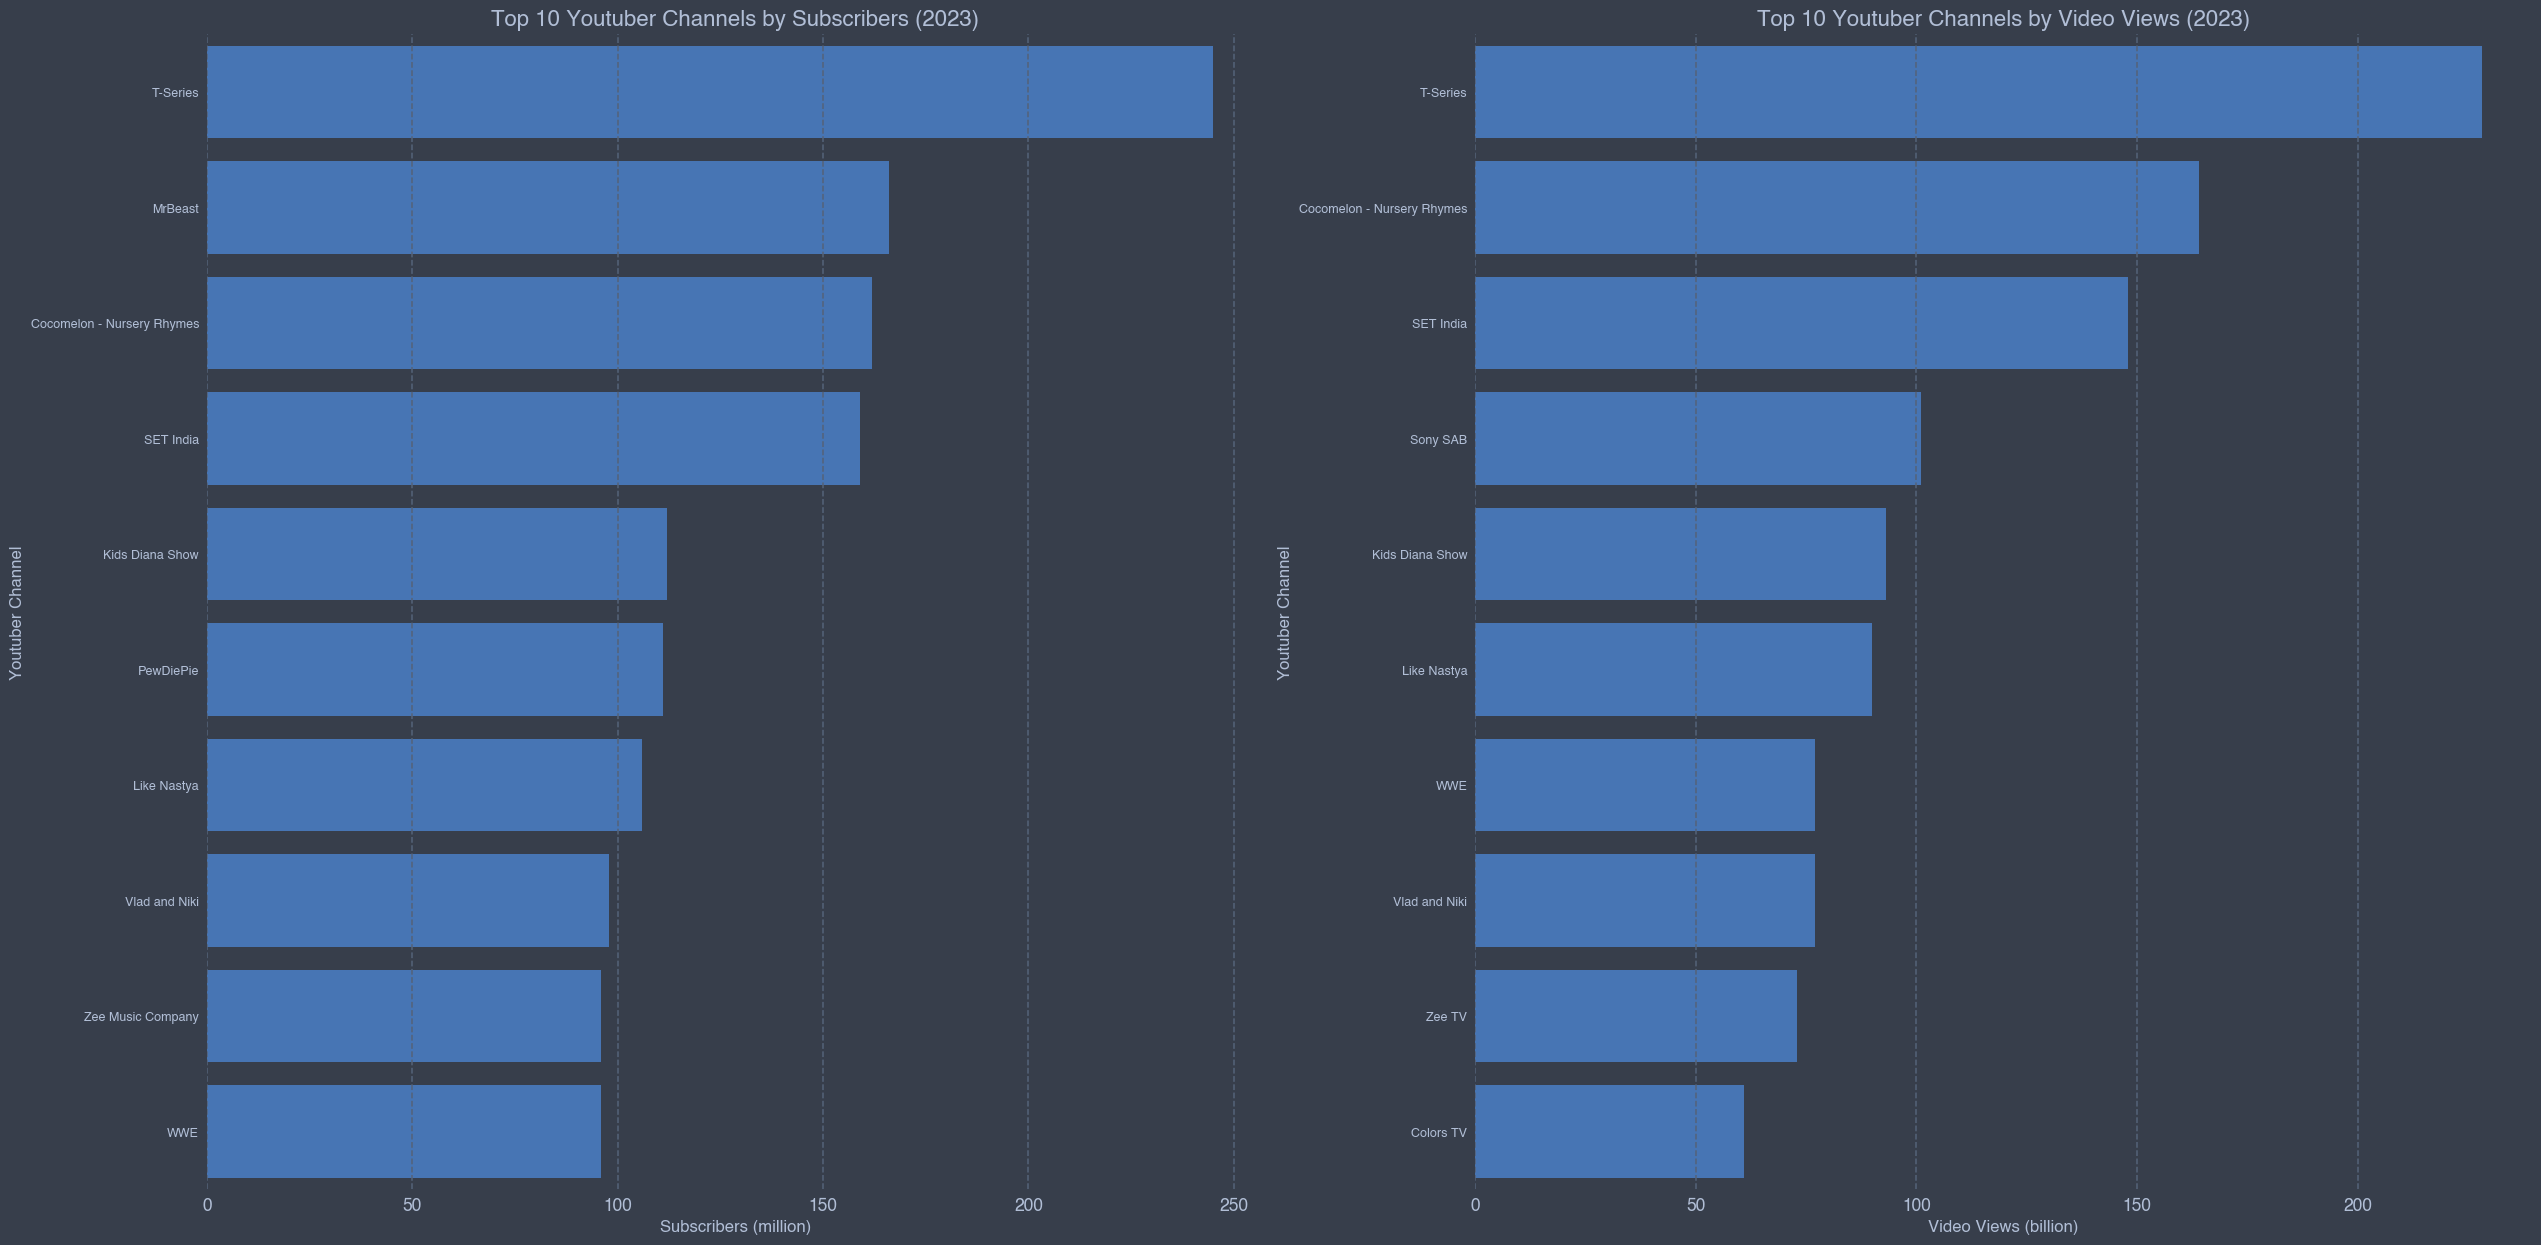

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (30, 15))

sns.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', ax = ax[0])
ax[0].set_title('Top 10 Youtuber Channels by Subscribers (2023)',fontweight = 'heavy', fontsize = 16)
ax[0].set_xlabel('Subscribers (million)',fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[0].grid(axis = 'x', linestyle ='--')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
plt.sca(ax[0])
plt.yticks(size = 9)

sns.barplot(top_10_views,x = 'Video Views (billion)' ,y = 'Youtuber', ax = ax[1]) 
ax[1].set_title('Top 10 Youtuber Channels by Video Views (2023)',fontweight = 'heavy', fontsize = 16)
ax[1].set_xlabel('Video Views (billion)',fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax[1].grid(axis = 'x', linestyle ='--')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.sca(ax[1])
plt.yticks(size = 9)

plt.show();

In [55]:
#Statistics table correlation
correlation = df[['Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']].corr()
correlation

,Subscribers,Video Views,Uploads,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
Subscribers,1.000000,0.823659,0.087606,0.427319,0.426945,-0.015456,-0.023950,0.083580,0.077677,-0.132192
Video Views,0.823659,1.000000,0.163997,0.549752,0.549121,-0.009473,0.000665,0.075701,0.072778,-0.137299
Uploads,0.087606,0.163997,1.000000,0.164597,0.164955,-0.214767,-0.189159,0.139848,0.069912,-0.163753
Lowest Monthly Earnings,0.427319,0.549752,0.164597,1.000000,0.999955,-0.053732,-0.040113,0.096322,0.074386,0.075421
Highest Monthly Earnings,0.426945,0.549121,0.164955,0.999955,1.000000,-0.053519,-0.039891,0.096296,0.074401,0.075385
Gross Tertiary Education Enrollment (%),-0.015456,-0.009473,-0.214767,-0.053732,-0.053519,1.000000,0.682986,-0.571518,-0.296061,-0.153923
Unemployment Rate,-0.023950,0.000665,-0.189159,-0.040113,-0.039891,0.682986,1.000000,-0.225163,0.132932,-0.120141
Population,0.083580,0.075701,0.139848,0.096322,0.096296,-0.571518,-0.225163,1.000000,0.910204,0.118703
Urban Population,0.077677,0.072778,0.069912,0.074386,0.074401,-0.296061,0.132932,0.910204,1.000000,0.080779
Created Year,-0.132192,-0.137299,-0.163753,0.075421,0.075385,-0.153923,-0.120141,0.118703,0.080779,1.000000


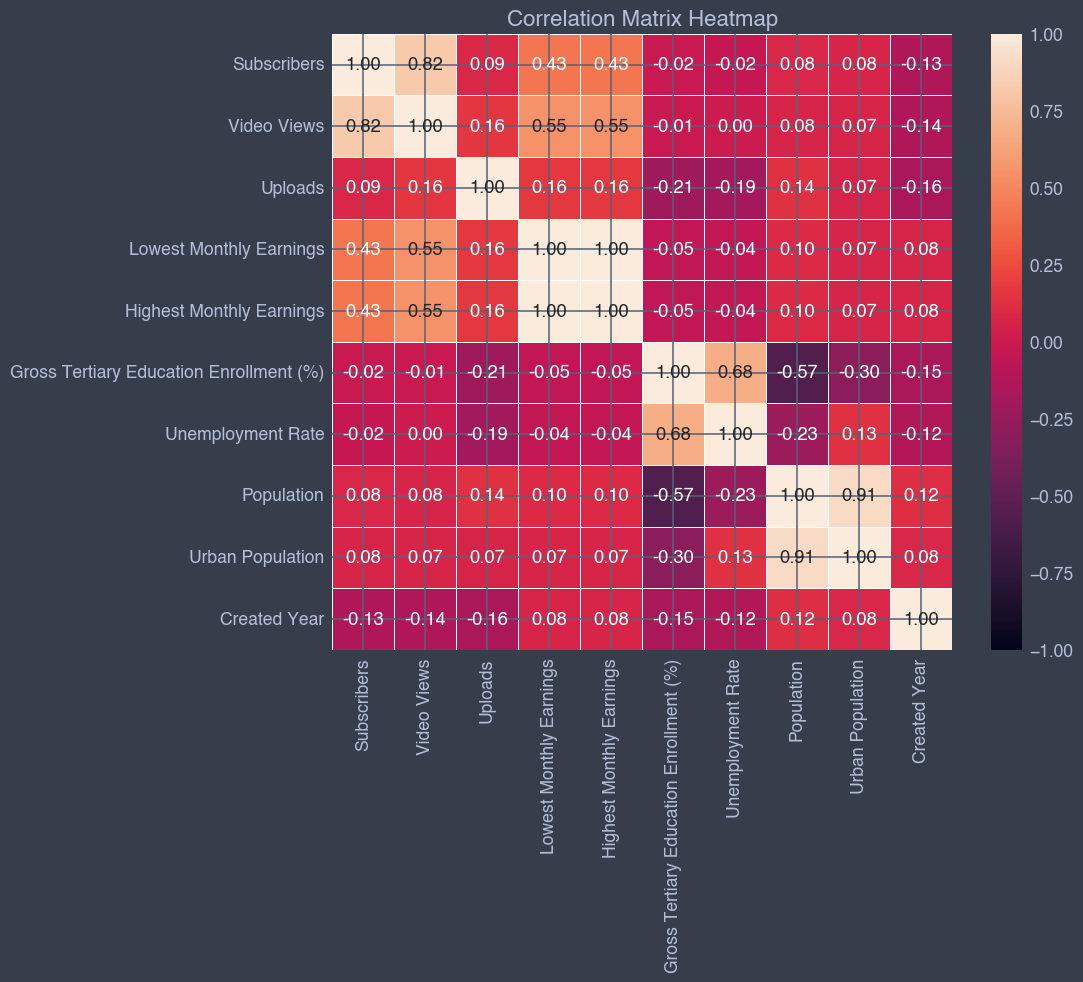

In [57]:
#Visualization heatmap

plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True,
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()

In [63]:
#Statistics Subscriber (million), Video Views (billion) & Uploads (k.)

#Select columns to show output
select_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

#Filter dataframe by select_columns
youtube_corr_statistics = df[select_columns]

#Convert 'Subscriber' in millions
youtube_corr_statistics.loc[:,'Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1000000).astype('int')

#Convert 'Video Views' in millions
youtube_corr_statistics.loc[:,'Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1000000000).astype('int')

#Convert 'Uploads' in thousand
youtube_corr_statistics.loc[:,'Uploads (k.)'] = (youtube_corr_statistics['Uploads'] / 1000)

youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)' ]]

#Show dataframe
youtube_corr_statistics.head()

,Youtuber,Subscribers (million),Video Views (billion),Uploads (k.)
0,T-Series,245,228,20.082
1,MrBeast,166,28,0.741
2,Cocomelon - Nursery Rhymes,162,164,0.966
3,SET India,159,148,116.536
4,Kids Diana Show,112,93,1.111


In [64]:
youtube_corr_statistics['Video Views (billion)'].mean()

10.711180124223603

In [65]:
youtube_corr_statistics['Subscribers (million)'].mean()

22.27225672877847

In [66]:
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95))
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

print('95% of YouTube channels have subscribers below:', per_subs, 'million')
print('95% of YouTube channels have video views below:', per_views, 'billion')


95% of YouTube channels have subscribers below: 46 million
95% of YouTube channels have video views below: 28 billion


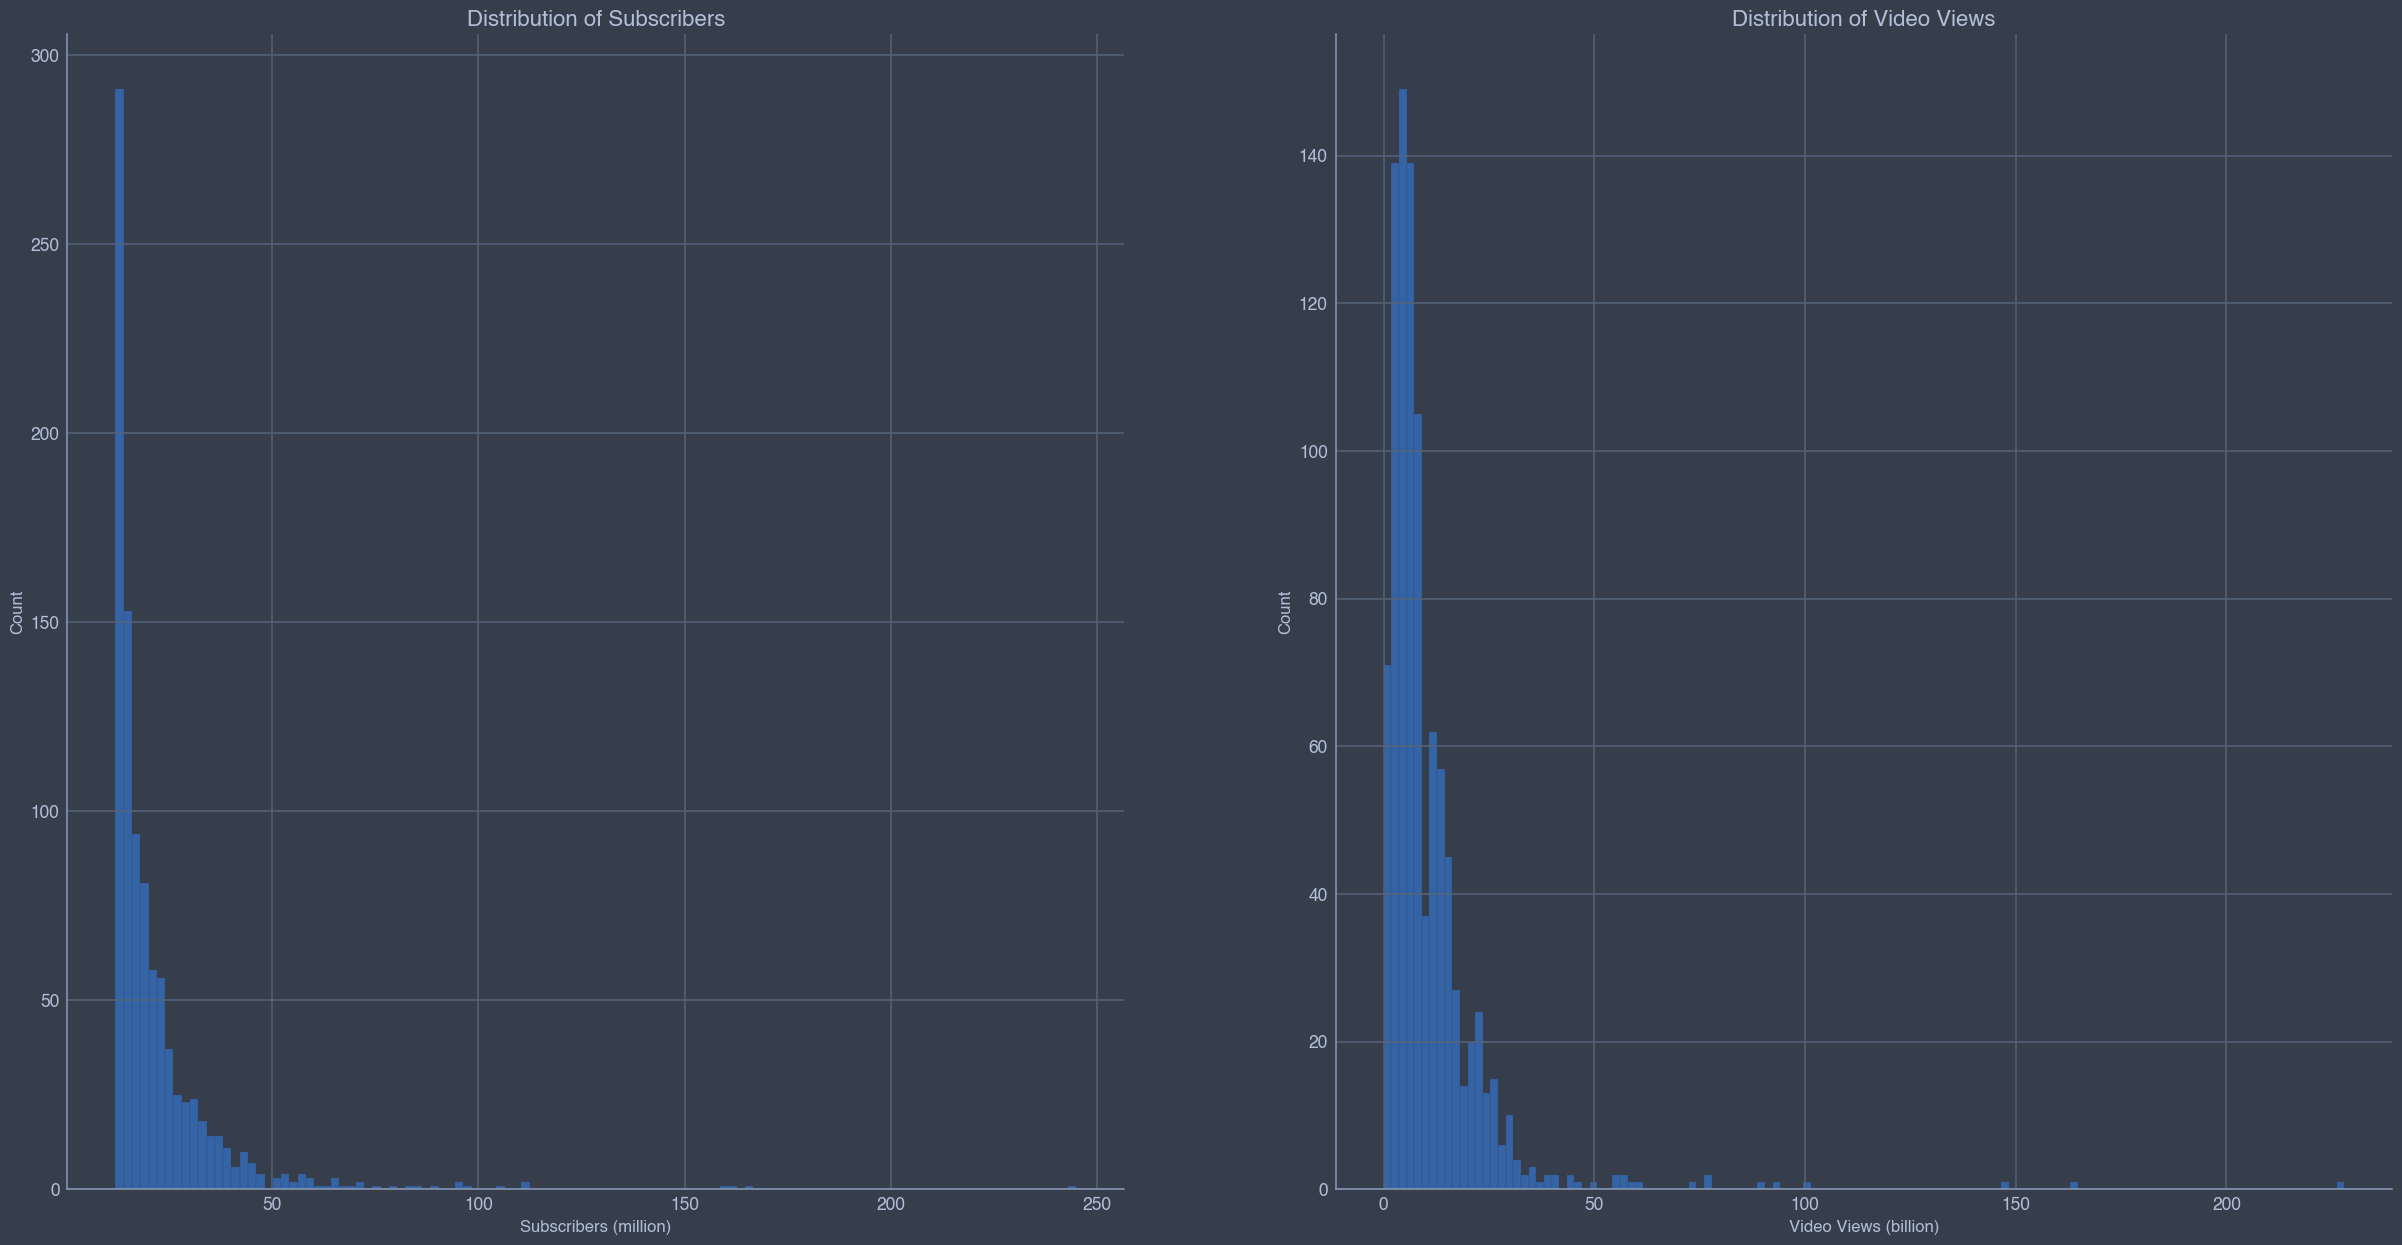

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,15))
sns.histplot(youtube_corr_statistics['Subscribers (million)'], ax = ax1)
ax1.set_title('Distribution of Subscribers', fontweight = 'heavy', fontsize = 16)
ax1.set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax1.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

sns.histplot(youtube_corr_statistics['Video Views (billion)'], ax = ax2)
ax2.set_title('Distribution of Video Views', fontweight = 'heavy', fontsize = 16)
ax2.set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax2.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)


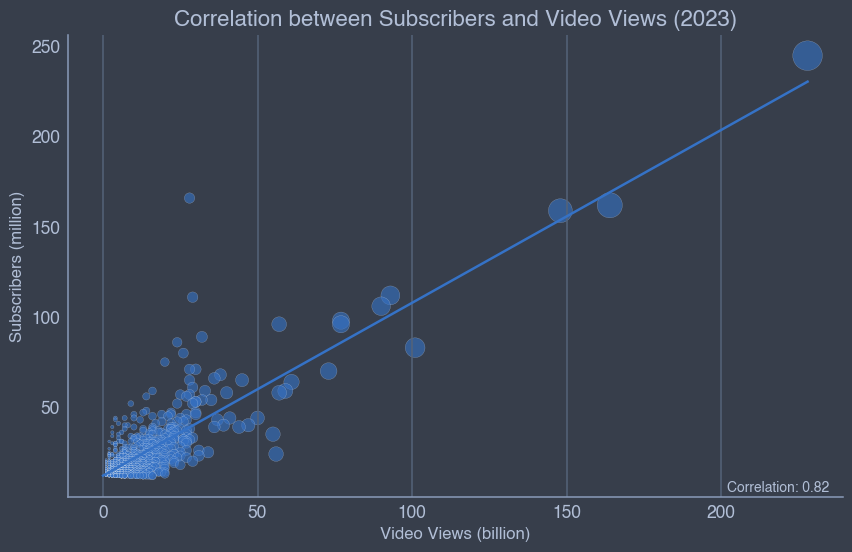

In [72]:
# Calculate the correlation coefficient
correlation = youtube_corr_statistics['Subscribers (million)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Set scaling factor of circle size
scaling_factor = 2 

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Chart
plt.figure(figsize= (10,6))
plt.title('Correlation between Subscribers and Video Views (2023)', fontweight = 'heavy', fontsize = 16 )
sns.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)',alpha=0.6, s = sizes)
sns.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Subscribers (million)', scatter=False, ci=None)
plt.xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
# plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

sns.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

In [125]:
top_upload_channels = df[['Youtuber', 'Category', 'Uploads']].sort_values(by= 'Uploads', ascending= False).reset_index(drop= True).head(10)
top_upload_channels

,Youtuber,Category,Uploads
0,ABP NEWS,People & Blogs,301308
1,GMA Integrated News,News & Politics,296272
2,TV9 Bharatvarsh,People & Blogs,293516
3,Aaj Tak,News & Politics,283775
4,IndiaTV,News & Politics,273255
5,KOMPASTV,News & Politics,269050
6,Thairath Online,News & Politics,244899
7,News 24,News & Politics,211620
8,ABS-CBN News,News & Politics,209520
9,TEDx Talks,Nonprofits & Activism,200933


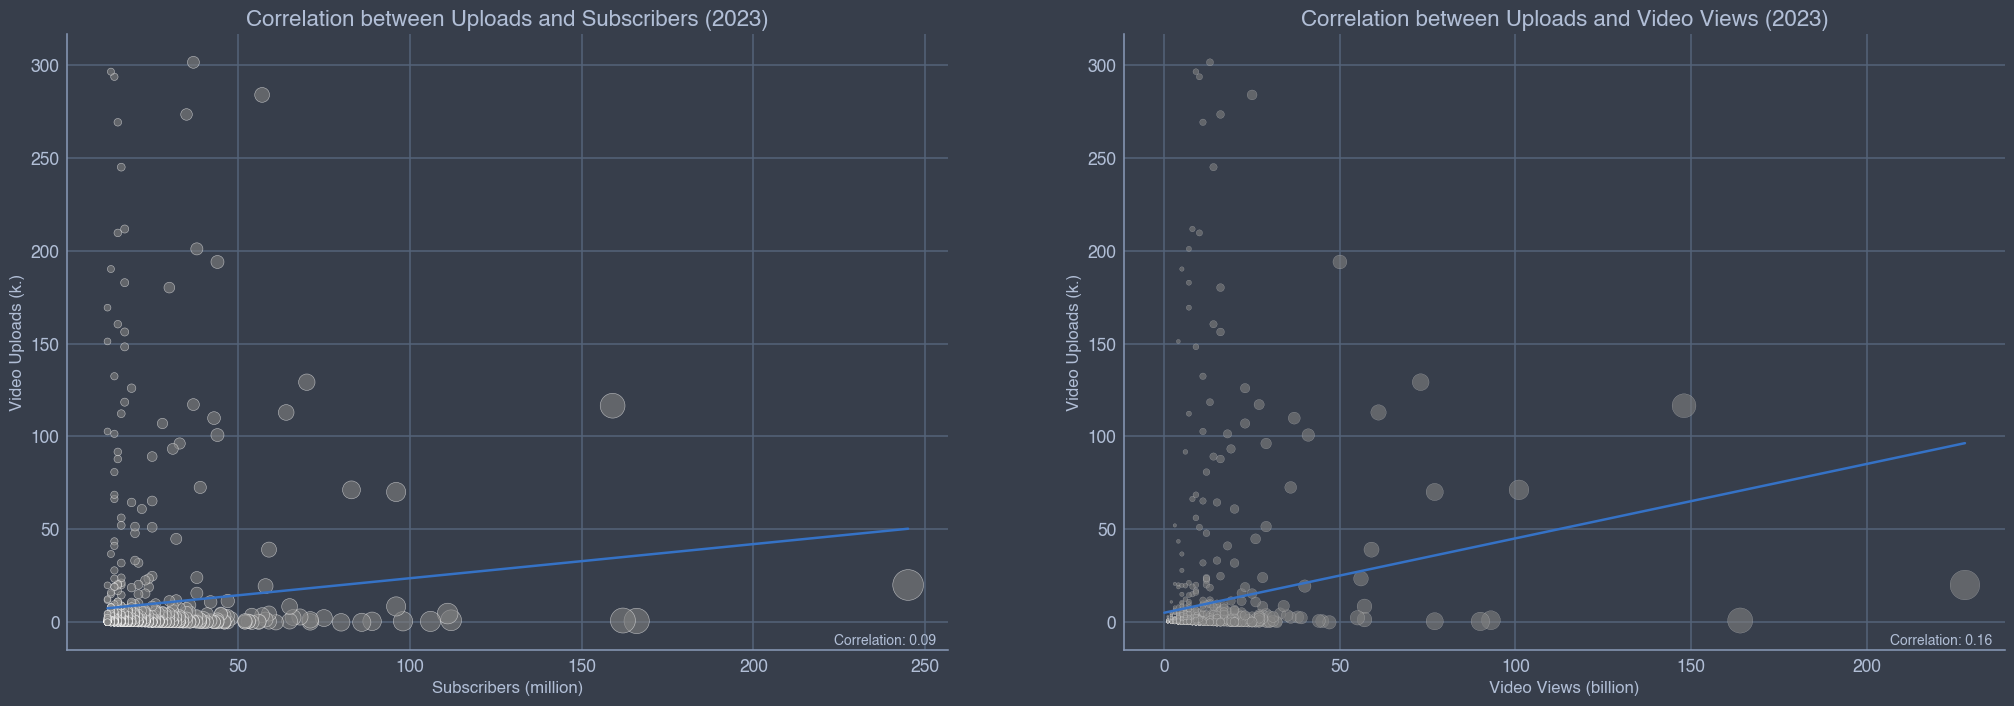

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [126]:
fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Upload & Subscribers
# Calculate the correlation coefficient
correlation_ax0 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Subscribers (million)'])
# Set scaling factor of circle size
scaling_factor_ax0 = 2 
# Calculate the size of circles 
sizes_ax0 = youtube_corr_statistics['Subscribers (million)'] * scaling_factor_ax0
# Chart
plt.figure(figsize= (10,6))
ax[0].set_title('Correlation between Uploads and Subscribers (2023)', fontweight = 'heavy', fontsize = 16 )
sns.scatterplot(data= youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax0, ax= ax[0])
sns.regplot(data= youtube_corr_statistics,  x='Subscribers (million)', y='Uploads (k.)', scatter=False, ci=None, ax= ax[0])
ax[0].set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax[0].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[0].annotate(f'Correlation: {correlation_ax0:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')

#Uploads & Video Views
# Calculate the correlation coefficient
correlation_ax1 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Video Views (billion)'])
# Set scaling factor of circle size
scaling_factor_ax1 = 2 
# Calculate the size of circles 
sizes_ax1 = youtube_corr_statistics['Video Views (billion)'] * scaling_factor
# Chart
plt.figure(figsize= (10,6))
ax[1].set_title('Correlation between Uploads and Video Views (2023)', fontweight = 'heavy', fontsize = 16 )
sns.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', color = 'gray',alpha=0.6, s = sizes_ax1, ax= ax[1])
sns.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Uploads (k.)', scatter=False, ci=None, ax= ax[1])
ax[1].set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax[1].set_ylabel('Video Uploads (k.)', fontweight = 'heavy', fontsize = 12)
ax[1].annotate(f'Correlation: {correlation_ax1:.2f}', 
             xy = (0.87, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10,          
             weight = 'bold')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show();

In [76]:
#Statistics by Category

#Group by lots of feature by Category
statis_category = df.groupby('Category').agg({'Category' : 'count',
                                                   'Uploads' : 'sum',
                                                   'Subscribers' : 'sum',
                                                   'Video Views' : 'sum'
                                                })
#Rename count feature
statis_category = statis_category.rename(columns= {'Category' : 'Count of Category'}).reset_index()

#Unit conversion
statis_category['Video Views (billion)'] = (statis_category['Video Views']/1000000000).astype('int')
statis_category['Subscribers (million)'] = (statis_category['Subscribers']/1000000).astype('int')
statis_category['Uploads (k.)'] = (statis_category['Uploads']/1000).astype('int')

#Select feature
statis_category = statis_category[['Category', 'Count of Category', 'Uploads (k.)','Subscribers (million)', 'Video Views (billion)']] #

#Show statistics table
statis_category


,Category,Count of Category,Uploads (k.),Subscribers (million),Video Views (billion)
0,Autos & Vehicles,2,3,35,15
1,Comedy,69,77,1388,550
2,Education,44,141,1175,691
3,Entertainment,235,2867,5061,2500
4,Film & Animation,44,127,1101,507
5,Gaming,92,403,1928,706
6,Howto & Style,39,64,760,194
7,Movies,2,7,51,15
8,Music,200,471,5155,3103
9,News & Politics,26,2924,536,270


In [77]:
#Select feature to to summary about Uploads
uploads_category = statis_category[['Category', 'Uploads (k.)']]

#Group features with counts under 300 into the general category other
uploads_category.loc[uploads_category['Uploads (k.)'] < 300, 'Category'] = 'Other'
uploads_category = uploads_category.groupby(['Category'])['Uploads (k.)'].sum().reset_index().sort_values(by = 'Uploads (k.)', ascending= False)

total = sum(uploads_category['Uploads (k.)'])
uploads_category['Percent Uploads (%)'] = [round((value / total) * 100,0) for value in uploads_category['Uploads (k.)']]
uploads_category.reset_index(drop= True, inplace= True)

#Show statistics table
uploads_category

,Category,Uploads (k.),Percent Uploads (%)
0,News & Politics,2924,32.0
1,Entertainment,2867,31.0
2,People & Blogs,1212,13.0
3,Other,887,10.0
4,Music,471,5.0
5,Gaming,403,4.0
6,Shows,354,4.0


In [78]:
uploads_category = uploads_category.sort_values(by = 'Percent Uploads (%)',  ascending= True)

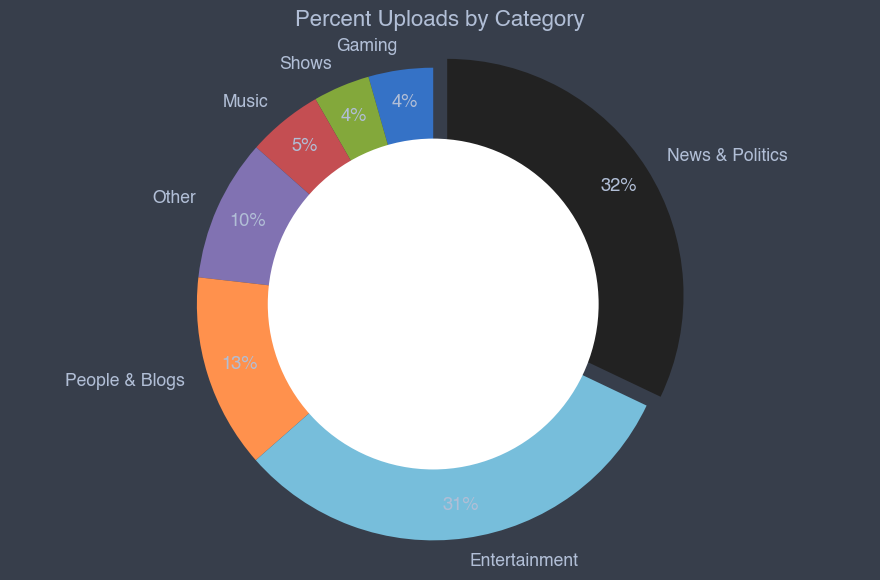

In [79]:
labels = uploads_category['Category']
sizes = uploads_category['Uploads (k.)']

explode = [0, 0, 0, 0, 0, 0, 0.07]
plt.figure(figsize= (9,6))
plt.pie(sizes, labels= labels,
        autopct='%1.0f%%',
        startangle=90,
        explode= explode,
        pctdistance=0.86)
# 
# plt.legend(title = 'Category',bbox_to_anchor=(1.1, 1), labels = labels)
plt.axis('equal')
plt.title('Percent Uploads by Category', fontweight = 'heavy', fontsize = 16)
plt.tight_layout()

circle = plt.Circle(xy= (0,0), radius= .70, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show();

In [80]:
#Select features
count_category = statis_category[['Category', 'Count of Category']].sort_values(by = 'Count of Category', ascending= False).reset_index(drop = True)

# Group features with counts under 300 into the general category other
count_category.loc[count_category['Count of Category'] < 20, 'Category'] = 'Other'
count_category = count_category.groupby(['Category'])['Count of Category'].sum().reset_index().sort_values(by = 'Count of Category', ascending= False)


# total = sum(count_category['Count of Category'])
# count_category['Percent Category'] = [round((value / total) * 100,0) for value in count_category['Count of Category']]
count_category.reset_index(drop= True, inplace= True)

#Show statistics table
count_category

,Category,Count of Category
0,Entertainment,235
1,Music,200
2,People & Blogs,128
3,Gaming,92
4,Other,89
5,Comedy,69
6,Education,44
7,Film & Animation,44
8,Howto & Style,39
9,News & Politics,26


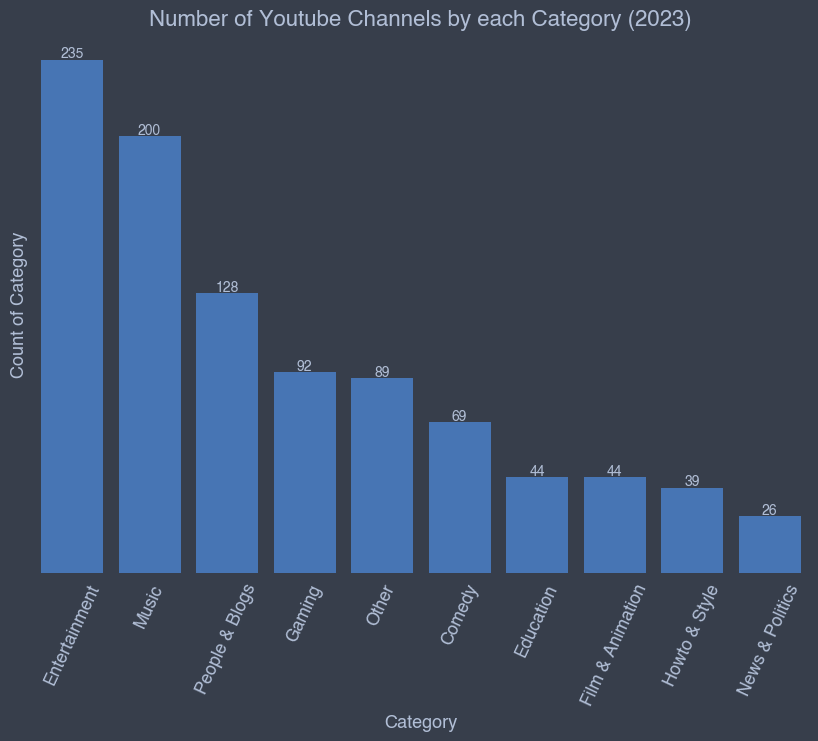

In [82]:
plt.figure(figsize=(10,7))
# Select data for categoies and values feature
cnt_category = count_category['Count of Category'].to_list()

#Chart
plt.title('Number of Youtube Channels by each Category (2023)', fontsize = 16, fontweight = 'heavy')
sns.barplot(data= count_category, x = 'Category', y = 'Count of Category')

#Add number for each columns
for i, value in enumerate(cnt_category):
    plt.text(i, value + 1, cnt_category[i],  ha = 'center', fontsize=10, fontweight = 'heavy')

sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Category', fontsize = 13, fontweight = 'heavy')
plt.ylabel('Count of Category', fontweight = 'heavy', fontsize = 13) 
plt.xticks(rotation = 65) 
plt.yticks([]) 
plt.show();


In [83]:
sub_youtuber_cate = df[['Youtuber', 'Category', 'Subscribers']].sort_values(by = 'Subscribers', ascending= False).reset_index(drop = True).head(10)
sub_youtuber_cate

,Youtuber,Category,Subscribers
0,T-Series,Music,245000000
1,MrBeast,Entertainment,166000000
2,Cocomelon - Nursery Rhymes,Education,162000000
3,SET India,Shows,159000000
4,Kids Diana Show,People & Blogs,112000000
5,PewDiePie,Gaming,111000000
6,Like Nastya,People & Blogs,106000000
7,Vlad and Niki,Entertainment,98900000
8,Zee Music Company,Music,96700000
9,WWE,Sports,96000000


In [84]:
#Select feature for subscribers chart
subs_category = statis_category[['Category', 'Subscribers (million)']].sort_values(by= 'Subscribers (million)', ascending= False).reset_index(drop= True)
subs_category['Percent (%)'] = round((subs_category['Subscribers (million)'] / sum(subs_category['Subscribers (million)'])) *100,0)
subs_category

,Category,Subscribers (million),Percent (%)
0,Music,5155,24.0
1,Entertainment,5061,23.0
2,People & Blogs,2720,12.0
3,Gaming,1928,9.0
4,Comedy,1388,6.0
5,Education,1175,5.0
6,Film & Animation,1101,5.0
7,Howto & Style,760,3.0
8,Other,669,3.0
9,News & Politics,536,2.0


In [85]:
view_youtuber_cate = df[['Youtuber', 'Category', 'Video Views']].sort_values(by = 'Video Views', ascending= False).reset_index(drop = True).head(10)
view_youtuber_cate

,Youtuber,Category,Video Views
0,T-Series,Music,228000000000
1,Cocomelon - Nursery Rhymes,Education,164000000000
2,SET India,Shows,148000000000
3,Sony SAB,Shows,101000000000
4,Kids Diana Show,People & Blogs,93247040539
5,Like Nastya,People & Blogs,90479060027
6,WWE,Sports,77428473662
7,Vlad and Niki,Entertainment,77180169894
8,Zee TV,Entertainment,73139054467
9,Colors TV,Shows,61510906457


In [86]:
#Select feature for views chart
views_category = statis_category[['Category', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop= True)
views_category['Percent (%)'] = round((views_category['Video Views (billion)'] / sum(views_category['Video Views (billion)']))*100,0)
views_category

,Category,Video Views (billion),Percent (%)
0,Music,3103,29.0
1,Entertainment,2500,23.0
2,People & Blogs,1251,12.0
3,Gaming,706,7.0
4,Education,691,6.0
5,Comedy,550,5.0
6,Film & Animation,507,5.0
7,Shows,432,4.0
8,Other,278,3.0
9,News & Politics,270,2.0


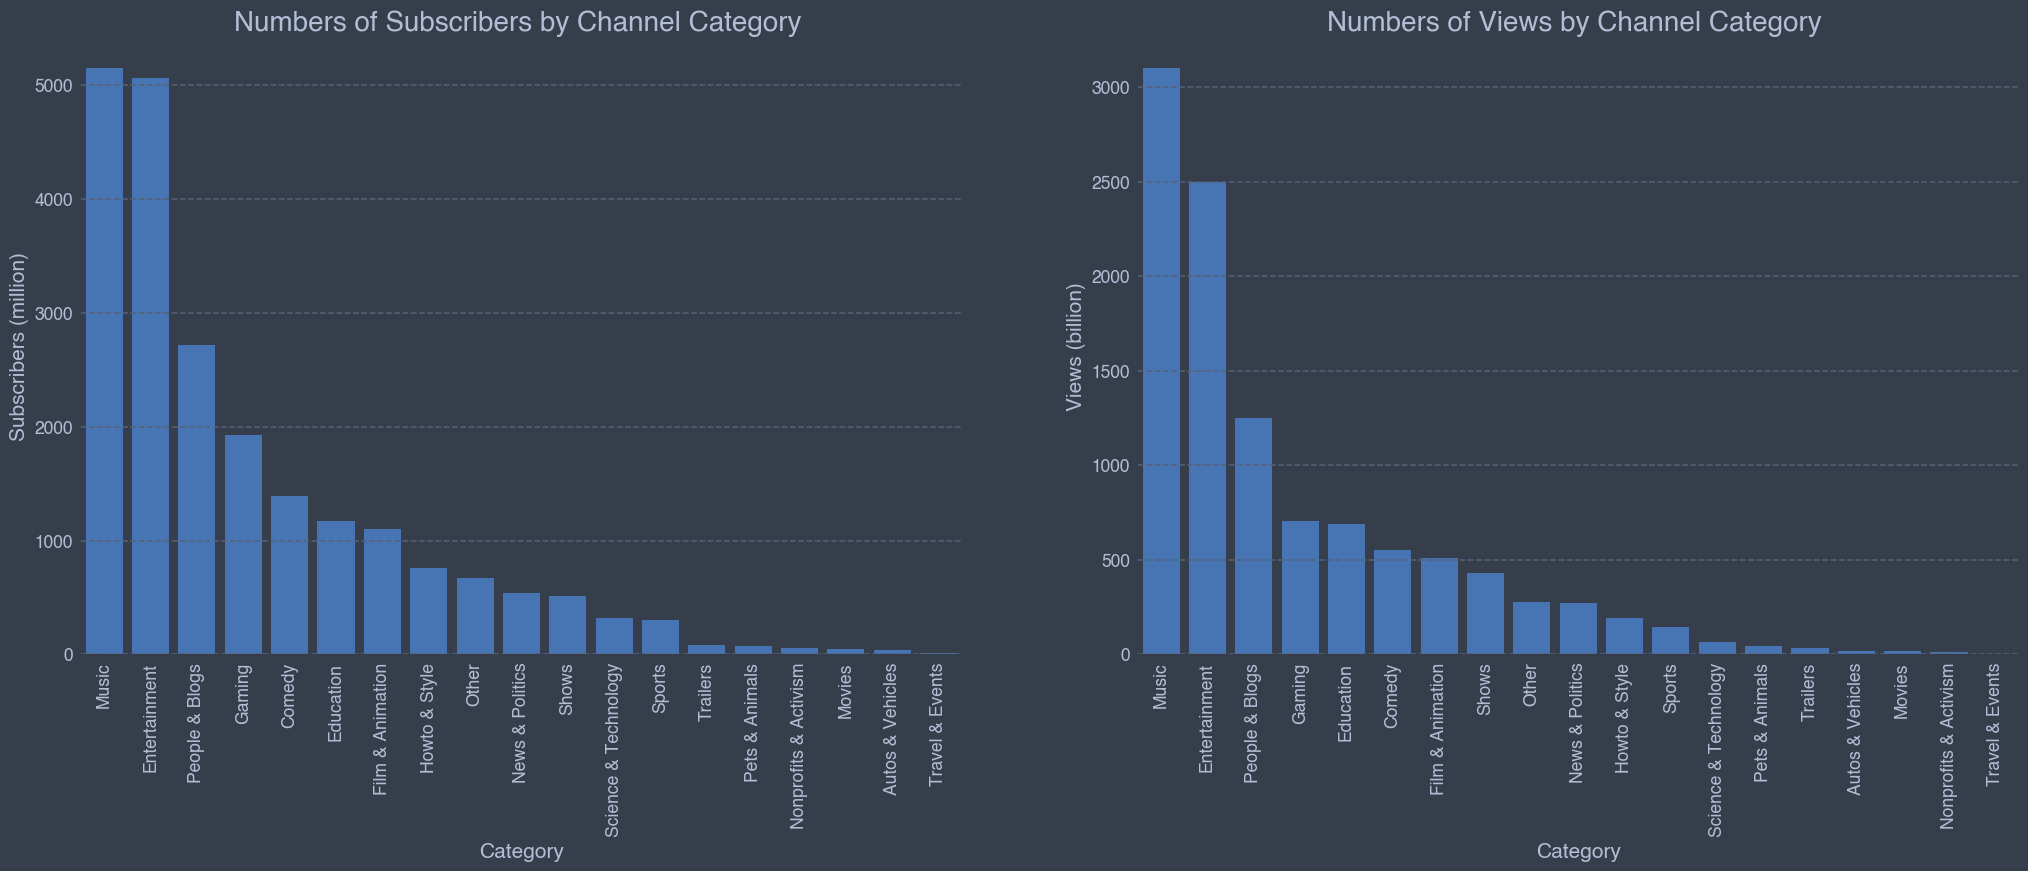

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (25,8))

#Subscribers chart
sns.barplot(data= subs_category, x= 'Category', y = 'Subscribers (million)', ax= ax[0]) 
ax[0].set_title('Numbers of Subscribers by Channel Category ', fontweight = 'heavy', fontsize = 20)
ax[0].set_ylabel('Subscribers (million)', fontsize = 15, fontweight = 'heavy')
ax[0].set_xlabel('Category',  fontsize = 15, fontweight = 'heavy')
ax[0].grid(axis = 'y', linestyle ='--')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
plt.sca(ax[0])
plt.xticks(rotation = 90)

#Views chart
sns.barplot(data= views_category, x= 'Category', y = 'Video Views (billion)', ax= ax[1])
ax[1].set_title('Numbers of Views by Channel Category ', fontweight = 'heavy', fontsize = 20)
ax[1].set_ylabel('Views (billion)',  fontsize = 15, fontweight = 'heavy')
ax[1].set_xlabel('Category',  fontsize = 15, fontweight = 'heavy')
ax[1].grid(axis = 'y', linestyle ='--')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.sca(ax[1])
plt.xticks(rotation = 90)

plt.show();


In [89]:
#Group subscribers and video views by categories
subs_views_category = df.groupby('Category').agg({'Subscribers' : 'sum',
                                                      'Video Views' : 'sum'})

#Create View-to-Subscriber Ratio 
subs_views_category['View-to-Subscriber Ratio'] = (subs_views_category['Video Views'] / subs_views_category['Subscribers']).astype('int')
subs_views_category.sort_values(by= 'View-to-Subscriber Ratio', ascending= False, inplace= True)
subs_views_category.reset_index( inplace= True)

#Show statistics table
subs_views_category

,Category,Subscribers,Video Views,View-to-Subscriber Ratio
0,Shows,512600000,432356612140,843
1,Pets & Animals,72400000,44866745899,619
2,Music,5155300000,3103516219048,602
3,Education,1175400000,691690418531,588
4,News & Politics,536400000,270391919347,504
5,Sports,298200000,147986290620,496
6,Entertainment,5061400000,2500154780534,493
7,Film & Animation,1101700000,507963782337,461
8,People & Blogs,2720900000,1251773521276,460
9,Trailers,78000000,33262717607,426


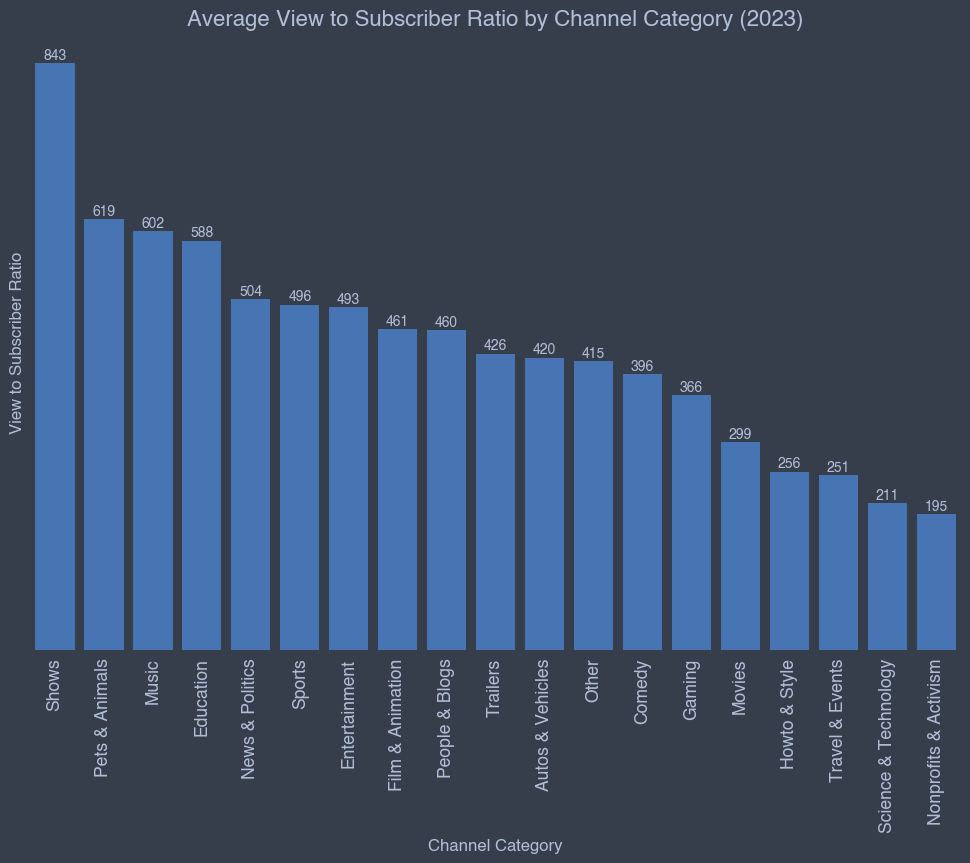

In [92]:
plt.figure(figsize= (12,8))

#Convert variable to a list
labels = subs_views_category['View-to-Subscriber Ratio'].to_list()

#Chart
plt.title('Average View to Subscriber Ratio by Channel Category (2023)', fontweight = 'heavy', fontsize = 16)
sns.barplot(data= subs_views_category, x = 'Category', y = 'View-to-Subscriber Ratio') #palette= youtube_color_a
plt.xlabel('Channel Category', fontsize = 12, fontweight = 'heavy')
plt.ylabel('View to Subscriber Ratio', fontsize = 12, fontweight = 'heavy')

#Add label for each columns in chart
for i, value in enumerate(labels):
    plt.text(i, value + 6, labels[i],  ha = 'center', fontsize=10)
    
sns.despine(left=True, bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.show();


In [93]:
print('Average views per subscriber for all categories:',round(subs_views_category['View-to-Subscriber Ratio'].mean(),0))

Average views per subscriber for all categories: 437.0


In [94]:
map_chart = df.groupby(['Country','Abbreviation'])[['Youtuber']].count().reset_index().rename(columns={'Youtuber':'Count of Country'}).sort_values(by= 'Count of Country', ascending= False)
map_chart.reset_index(drop = True, inplace= True)

map_chart['Percent'] = round((map_chart['Count of Country'] / sum(map_chart['Count of Country']))*100,1)
map_chart


,Country,Abbreviation,Count of Country,Percent
0,United States,US,306,31.7
1,India,IN,168,17.4
2,Other,Other,113,11.7
3,Brazil,BR,61,6.3
4,United Kingdom,GB,43,4.5
5,Mexico,MX,33,3.4
6,Indonesia,ID,28,2.9
7,Spain,ES,22,2.3
8,Thailand,TH,18,1.9
9,South Korea,KR,16,1.7


In [96]:

#Select data for 'Unemployment Rate by Country chart'
unempl_rate = df[['Country', 'Unemployment Rate']].sort_values(by= 'Unemployment Rate', ascending= False).reset_index(drop= True)
unempl_rate = unempl_rate.drop_duplicates().reset_index(drop= True)
unempl_rate.head()

,Country,Unemployment Rate
0,Jordan,14.72
1,United States,14.70
2,Spain,13.96
3,Turkey,13.49
4,Iraq,12.82


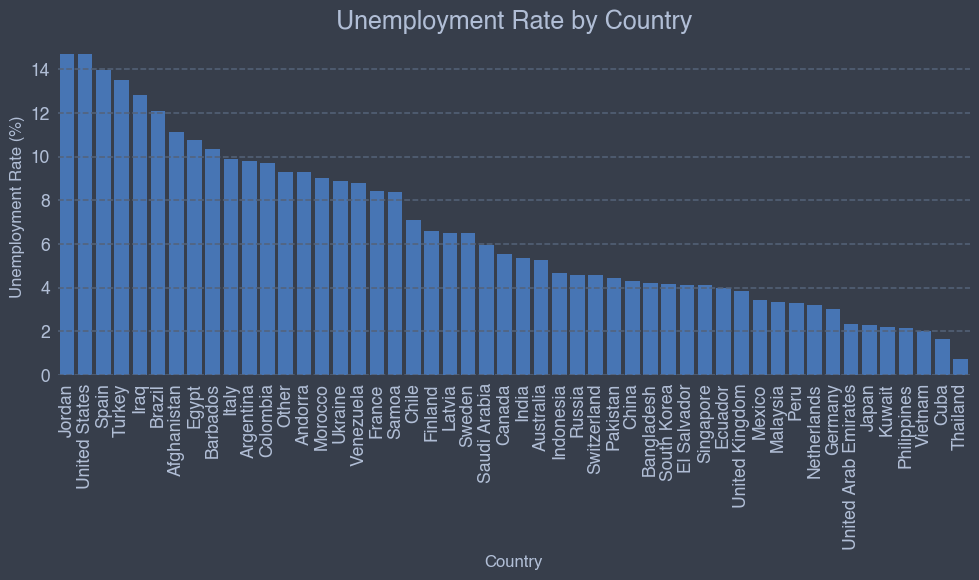

In [98]:
#Chart
plt.figure(figsize  = (10,6))
sns.barplot(data = unempl_rate, x = 'Country', y = 'Unemployment Rate')
plt.title('Unemployment Rate by Country', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Unemployment Rate (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();

In [99]:
#Select data for 'Gross Tertiary Education Enrollment Rate by Country chart'
education_rate = df[['Country', 'Gross Tertiary Education Enrollment (%)']].sort_values(by= 'Gross Tertiary Education Enrollment (%)', ascending= False).reset_index(drop= True)
education_rate = education_rate.drop_duplicates().reset_index(drop= True)
education_rate.head(10)


,Country,Gross Tertiary Education Enrollment (%)
0,Australia,113.1
1,South Korea,94.3
2,Argentina,90.0
3,Spain,88.9
4,Chile,88.5
5,United States,88.2
6,Finland,88.2
7,Latvia,88.1
8,Netherlands,85.0
9,Singapore,84.8


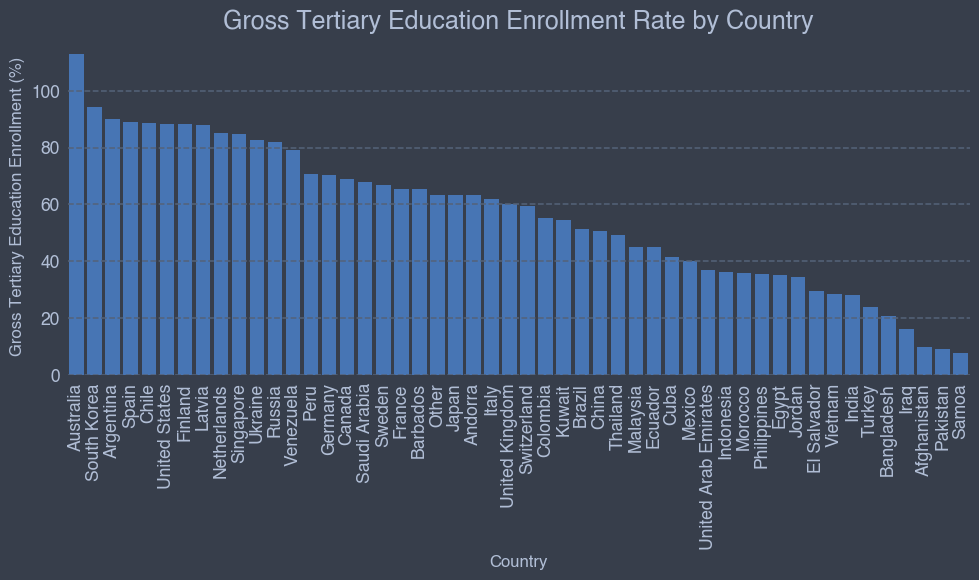

In [102]:
#Chart
plt.figure(figsize  = (10,6))
sns.barplot(data = education_rate, x = 'Country', y = 'Gross Tertiary Education Enrollment (%)')
plt.title('Gross Tertiary Education Enrollment Rate by Country', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Gross Tertiary Education Enrollment (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();


In [105]:
#Create column 'Urbanization Rate (%)' in youtube dataset
df['Urbanization Rate (%)'] = round((df['Urban Population']/df['Population']) * 100,0)

urban_rate = df[['Country','Abbreviation', 'Urbanization Rate (%)']].sort_values(by= 'Urbanization Rate (%)', ascending= False).reset_index(drop= True)
urban_rate = urban_rate.drop_duplicates().reset_index(drop= True)
urban_rate.head(20)

,Country,Abbreviation,Urbanization Rate (%)
0,Singapore,SG,100.0
1,Kuwait,KW,100.0
2,Argentina,AR,92.0
3,Japan,JP,92.0
4,Netherlands,NL,92.0
5,Jordan,JO,91.0
6,Venezuela,VE,88.0
7,Sweden,SE,88.0
8,Chile,CL,88.0
9,United Arab Emirates,AE,87.0


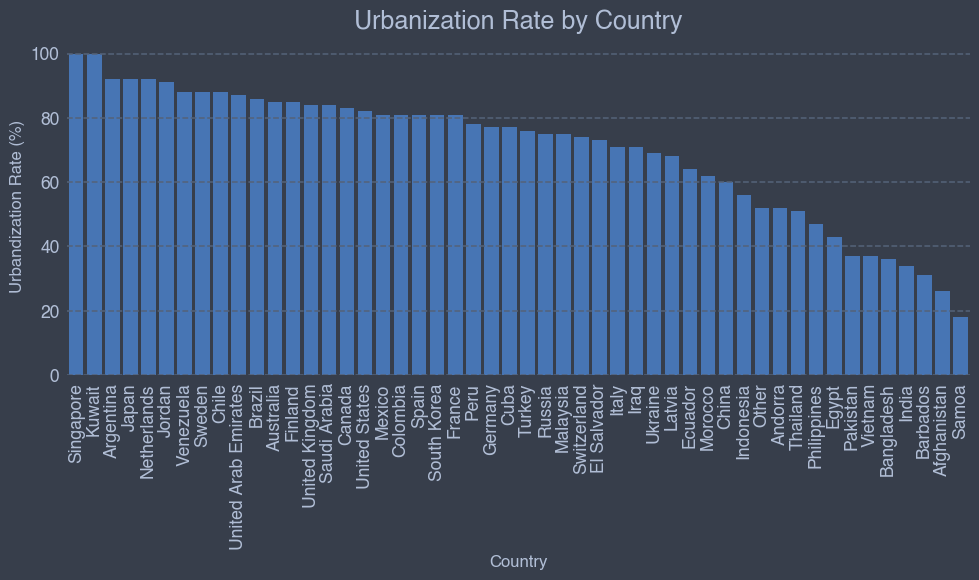

In [106]:
#Chart
plt.figure(figsize  = (10,6))
sns.barplot(data = urban_rate, x = 'Country', y = 'Urbanization Rate (%)')
plt.title('Urbanization Rate by Country', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Country', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Urbandization Rate (%)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.tight_layout()
plt.show();



In [107]:
cnt_created_year = df.groupby('Created Year').size().to_frame().reset_index().rename(columns= {0 : 'Count'})
cnt_created_year.sort_values(by = 'Count', ascending= False)

,Created Year,Count
9,2014,95
1,2006,89
6,2011,81
11,2016,76
8,2013,71
10,2015,70
7,2012,68
12,2017,63
4,2009,52
2,2007,49


<Figure size 1200x800 with 0 Axes>

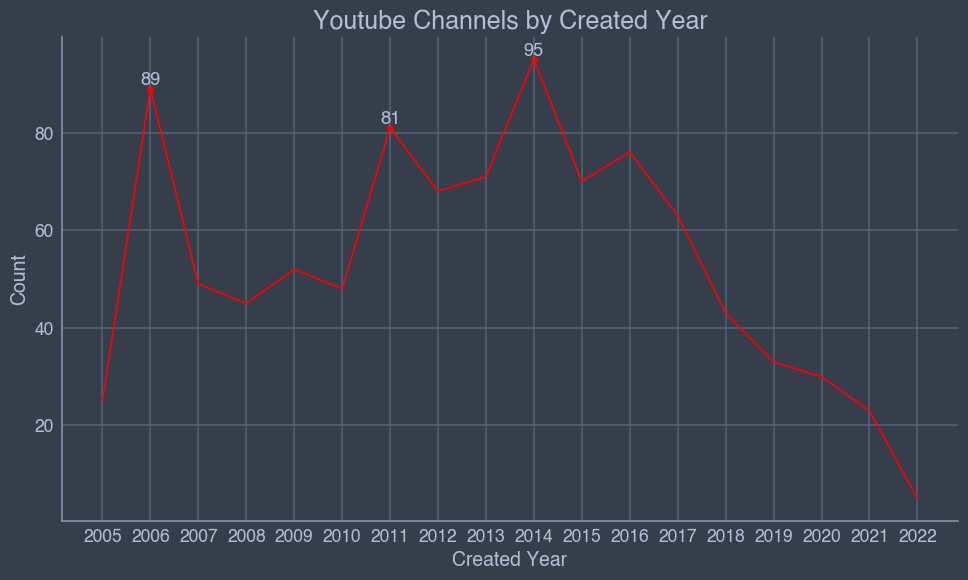

In [108]:
plt.figure(figsize= (12,8))

plt.figure( figsize= (10,6))
plt.title('Youtube Channels by Created Year', fontweight = 'heavy', fontsize = 18)
sns.lineplot(data = cnt_created_year, y = 'Count', x = 'Created Year', color = 'red')

label_points = [(2014, 95), (2006, 89), (2011, 81)]
for point in label_points:
    plt.text(point[0], point[1], f'{point[1]}', ha='center', va='bottom')

for point in label_points:
    x, y = point
    plt.scatter(x, y, color='red', marker='o', s=20)
    
plt.xlabel('Created Year', fontweight = 'heavy', fontsize = 14)
plt.ylabel('Count', fontweight = 'heavy', fontsize = 14)
sns.despine(left=False, bottom=False)
# plt.grid(axis = 'x', linestyle ='-.')
plt.tight_layout()
plt.xticks(cnt_created_year['Created Year'])
plt.show()

In [109]:
top_cnt_channel_by_year = df.groupby(['Created Year', 'Category'])['Youtuber'].count().reset_index().sort_values(by='Youtuber', ascending= False).drop_duplicates(subset='Created Year').sort_values(by='Created Year')
top_cnt_channel_by_year.reset_index(drop= True, inplace=True)
top_cnt_channel_by_year

,Created Year,Category,Youtuber
0,2005,Music,9
1,2006,Entertainment,22
2,2007,Music,17
3,2008,Music,15
4,2009,Music,24
5,2010,Music,18
6,2011,Music,23
7,2012,Music,18
8,2013,Entertainment,19
9,2014,Entertainment,18


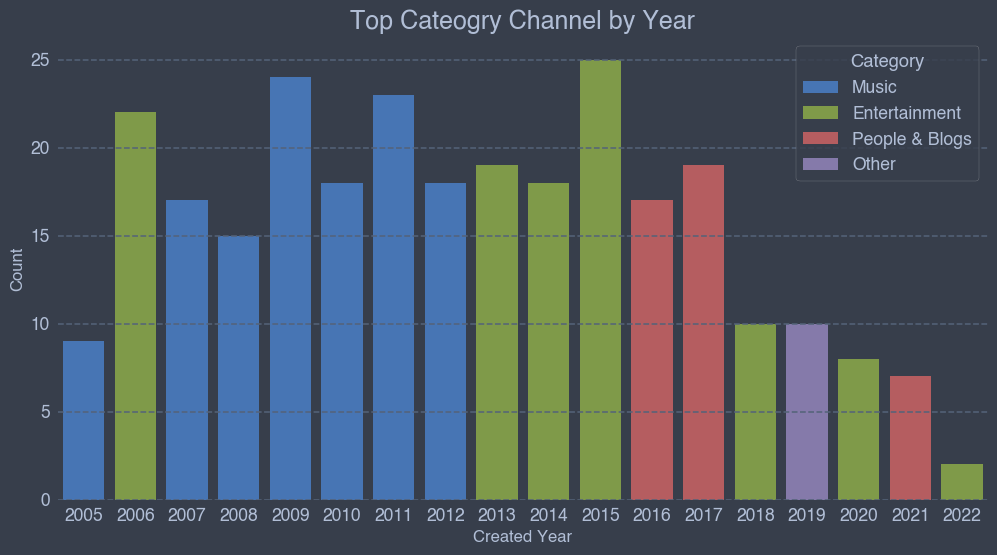

In [110]:
plt.figure(figsize= (12,6))
sns.barplot(data = top_cnt_channel_by_year, x = 'Created Year', y = 'Youtuber', hue = 'Category', dodge=False) 
plt.title('Top Cateogry Channel by Year', fontweight = 'heavy', fontsize = 18)
plt.xlabel('Created Year', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Count', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 0, ha = 'center')
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.show()

In [111]:
potentially_lucrative = df[['Category', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]
potentially_lucrative.sample(5)

,Category,Lowest Monthly Earnings,Highest Monthly Earnings
484,Film & Animation,29400.00,470900.0
850,Music,21600.00,345100.0
229,Music,12300.00,196000.0
351,Music,0.02,0.4
144,Film & Animation,61200.00,979700.0


In [112]:
potentially_lucrative['Average Monthly Earnings'] = (potentially_lucrative['Lowest Monthly Earnings'] + potentially_lucrative['Highest Monthly Earnings'])/2
potentially_lucrative.sample(5)

,Category,Lowest Monthly Earnings,Highest Monthly Earnings,Average Monthly Earnings
207,Entertainment,180500.0,2900000.0,1540250.0
465,Sports,97800.0,1600000.0,848900.0
528,Nonprofits & Activism,37400.0,598200.0,317800.0
821,Music,8800.0,141200.0,75000.0
812,Gaming,3400.0,53700.0,28550.0


In [113]:
category_avg_earnings = potentially_lucrative.groupby('Category')['Average Monthly Earnings'].mean().reset_index()
category_avg_earnings['Average Monthly Earnings (1000$)'] = (category_avg_earnings['Average Monthly Earnings'] /1000).astype('int')
category_avg_earnings.sort_values(by= 'Average Monthly Earnings (1000$)', ascending= False, inplace= True)
category_avg_earnings.reset_index(drop = True, inplace= True)
category_avg_earnings

,Category,Average Monthly Earnings,Average Monthly Earnings (1000$)
0,Shows,1.239268e+06,1239
1,Other,6.365854e+05,636
2,Autos & Vehicles,5.773250e+05,577
3,Sports,4.285000e+05,428
4,Pets & Animals,4.222039e+05,422
5,Film & Animation,3.924375e+05,392
6,Education,3.766251e+05,376
7,Comedy,3.550899e+05,355
8,News & Politics,3.414123e+05,341
9,Entertainment,3.384038e+05,338


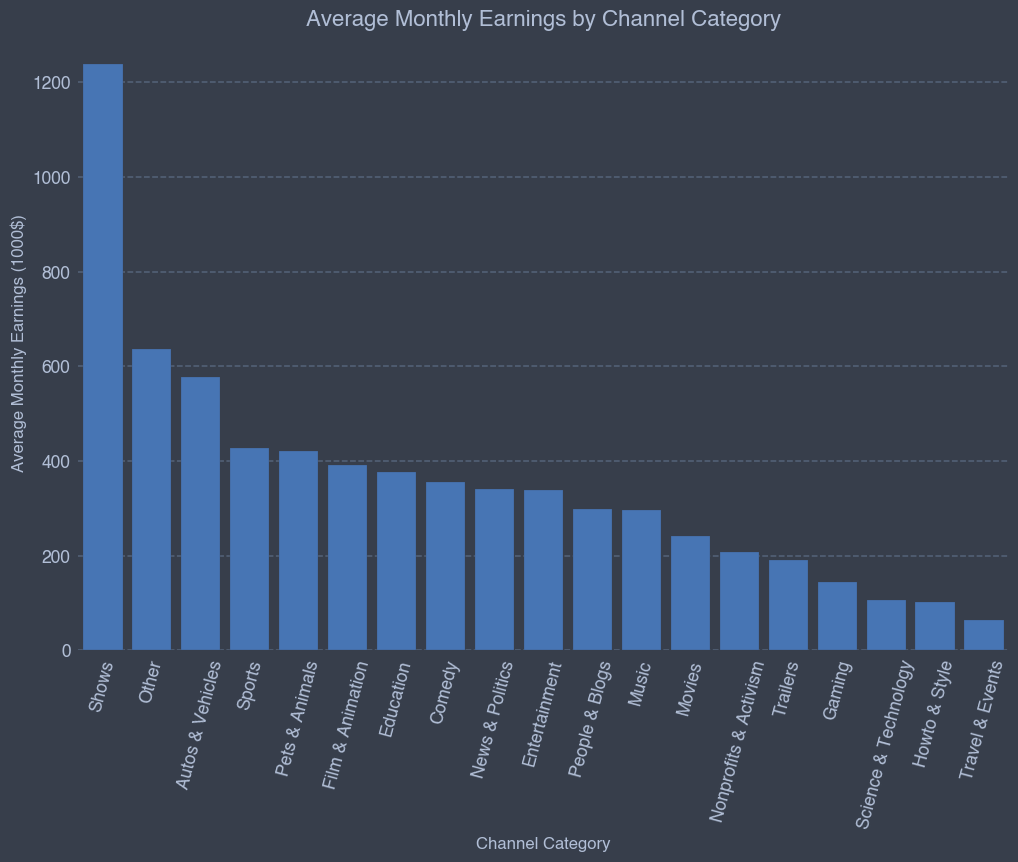

In [123]:
plt.figure(figsize=(12,8))
sns.barplot(data= category_avg_earnings, x = 'Category', y = 'Average Monthly Earnings (1000$)')
plt.title('Average Monthly Earnings by Channel Category', fontweight = 'heavy', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Channel Category', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Average Monthly Earnings (1000$)', fontweight = 'heavy', fontsize = 12)
plt.xticks(rotation = 75)
plt.show()

In [117]:
#Select 4 columns (Youtuber, Video Views, Lowest Monthly Earnings and Highest Monthly Earnings) 
views_earnings = df[['Youtuber', 'Video Views', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]

#Add column Avg for Earnings
views_earnings['Average Monthly Earnings'] = (views_earnings['Lowest Monthly Earnings'] + views_earnings['Highest Monthly Earnings'])/2

#Change the unit of Earnings (1000$)
views_earnings['Average Monthly Earnings (1000$)'] = (views_earnings['Average Monthly Earnings'] /1000).astype('int')

#Change the unit of Video Views (billion)
views_earnings['Video Views (billion)'] = (views_earnings['Video Views'] /1000000000).astype('int')

#Select final column
views_earnings = views_earnings[['Youtuber', 'Video Views (billion)', 'Average Monthly Earnings (1000$)']]

#Show statistics table
views_earnings.head()

,Youtuber,Video Views (billion),Average Monthly Earnings (1000$)
0,T-Series,228,4782
1,MrBeast,28,2868
2,Cocomelon - Nursery Rhymes,164,4196
3,SET India,148,3877
4,Kids Diana Show,93,1541


In [118]:
# Calculate the correlation coefficient
correlation = views_earnings['Average Monthly Earnings (1000$)'].corr(views_earnings['Video Views (billion)'])

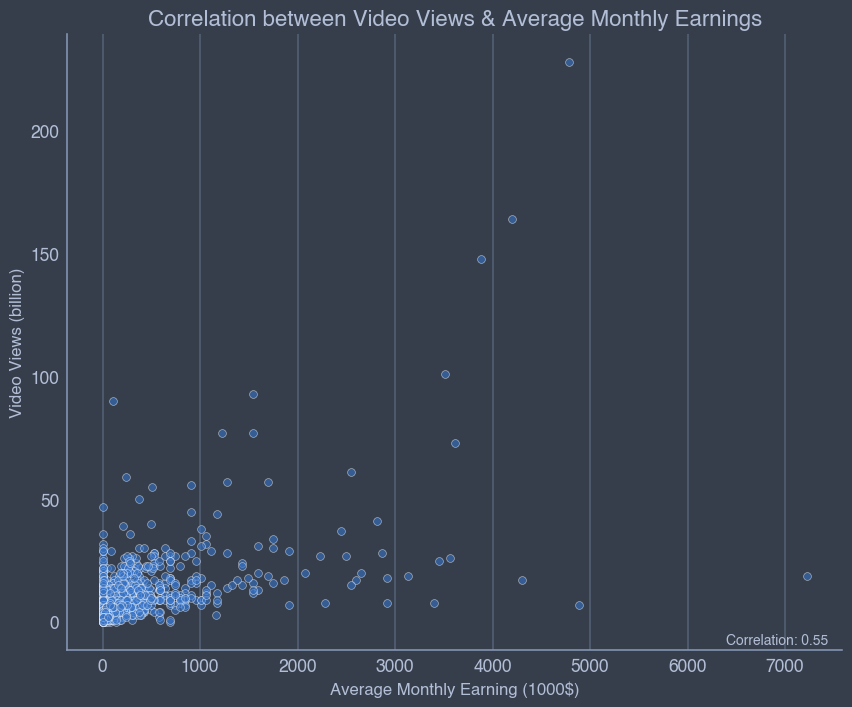

In [124]:
#Edit chart
plt.figure(figsize=(10,8))
sns.scatterplot(data = views_earnings, x = 'Average Monthly Earnings (1000$)', y = 'Video Views (billion)', alpha = 0.6)
plt.title('Correlation between Video Views & Average Monthly Earnings', fontsize = 16, fontweight = 'heavy')
plt.xlabel('Average Monthly Earning (1000$)', fontsize = 12, fontweight = 'heavy')
plt.ylabel('Video Views (billion)', fontsize = 12, fontweight = 'heavy')

sns.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()